In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\yalam\\OneDrive\\Desktop\\car_purchasing.csv", encoding='ISO-8859-1')

In [5]:
df.head()

customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773          42925.70921  
3  548599.0524          67422.36313  
4  560304.0671          55915.46248

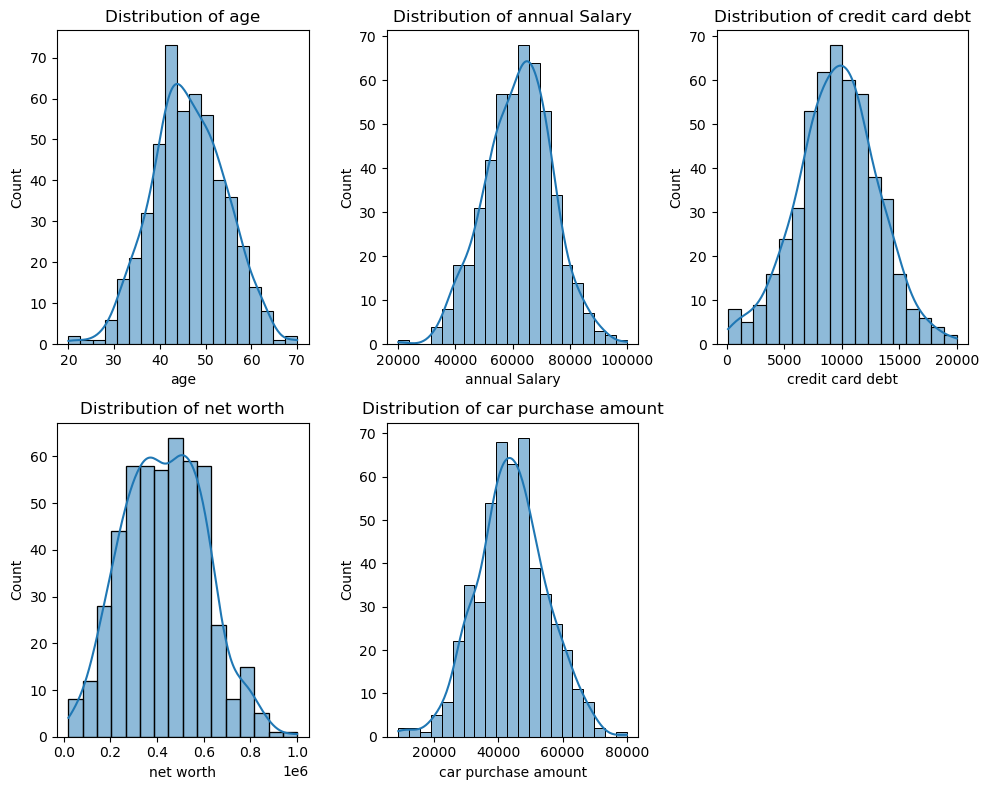

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

numeric_columns = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Creating a subplot for each variable
    sns.histplot(df[column], kde=True)  # KDE plot for smooth distribution
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

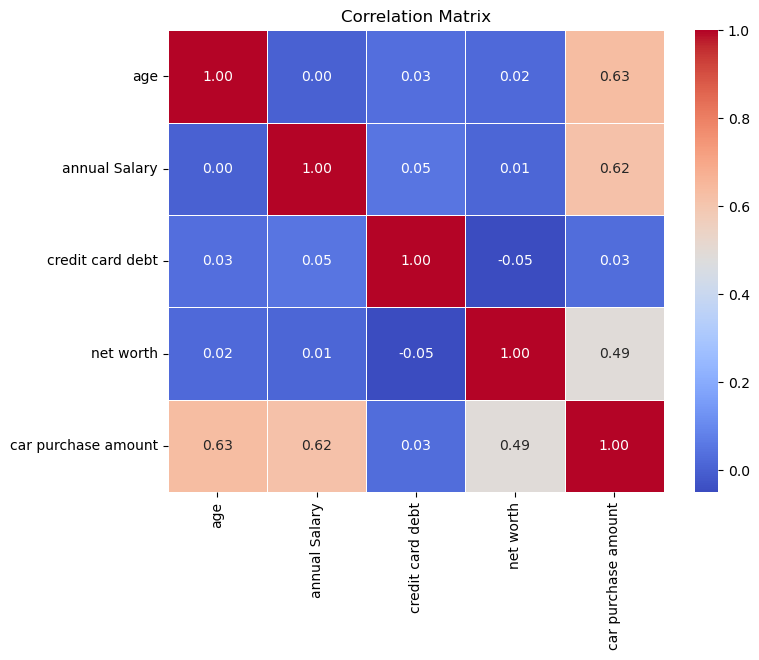

In [64]:
corr = df[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

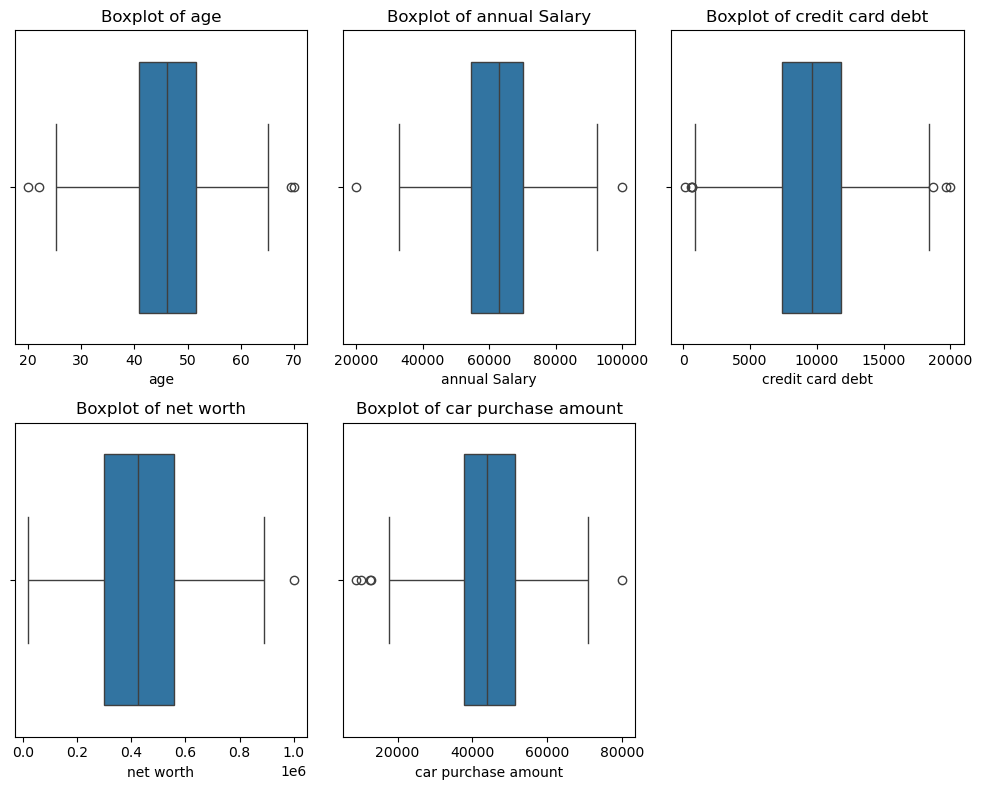

In [78]:
plt.figure(figsize=(10, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

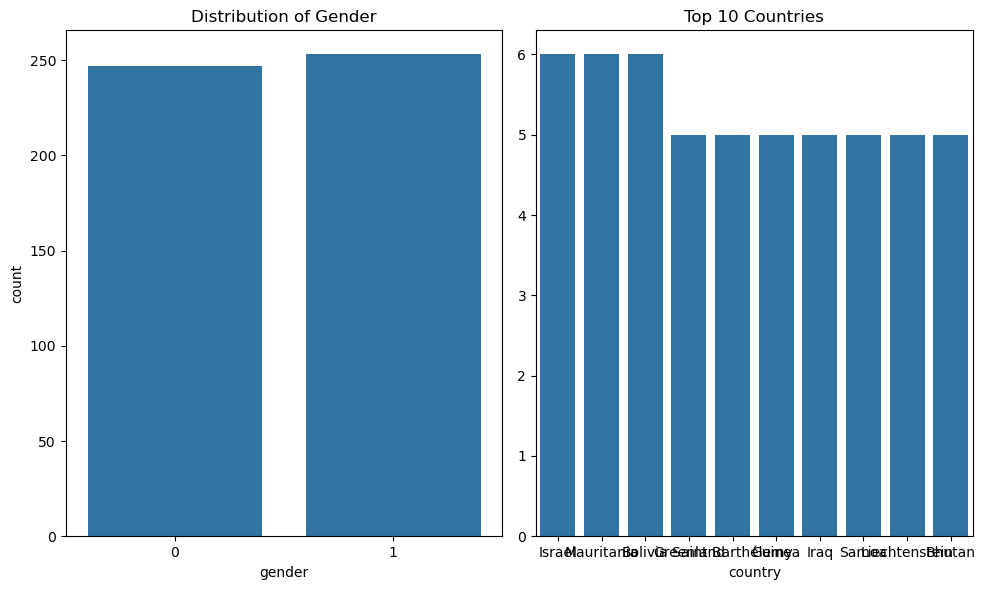

In [82]:
plt.figure(figsize=(10, 6))

# Gender distribution
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='gender')
plt.title('Distribution of Gender')

# Country distribution (only top 10 countries to avoid clutter)
plt.subplot(1, 2, 2)
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries')

plt.tight_layout()
plt.show()

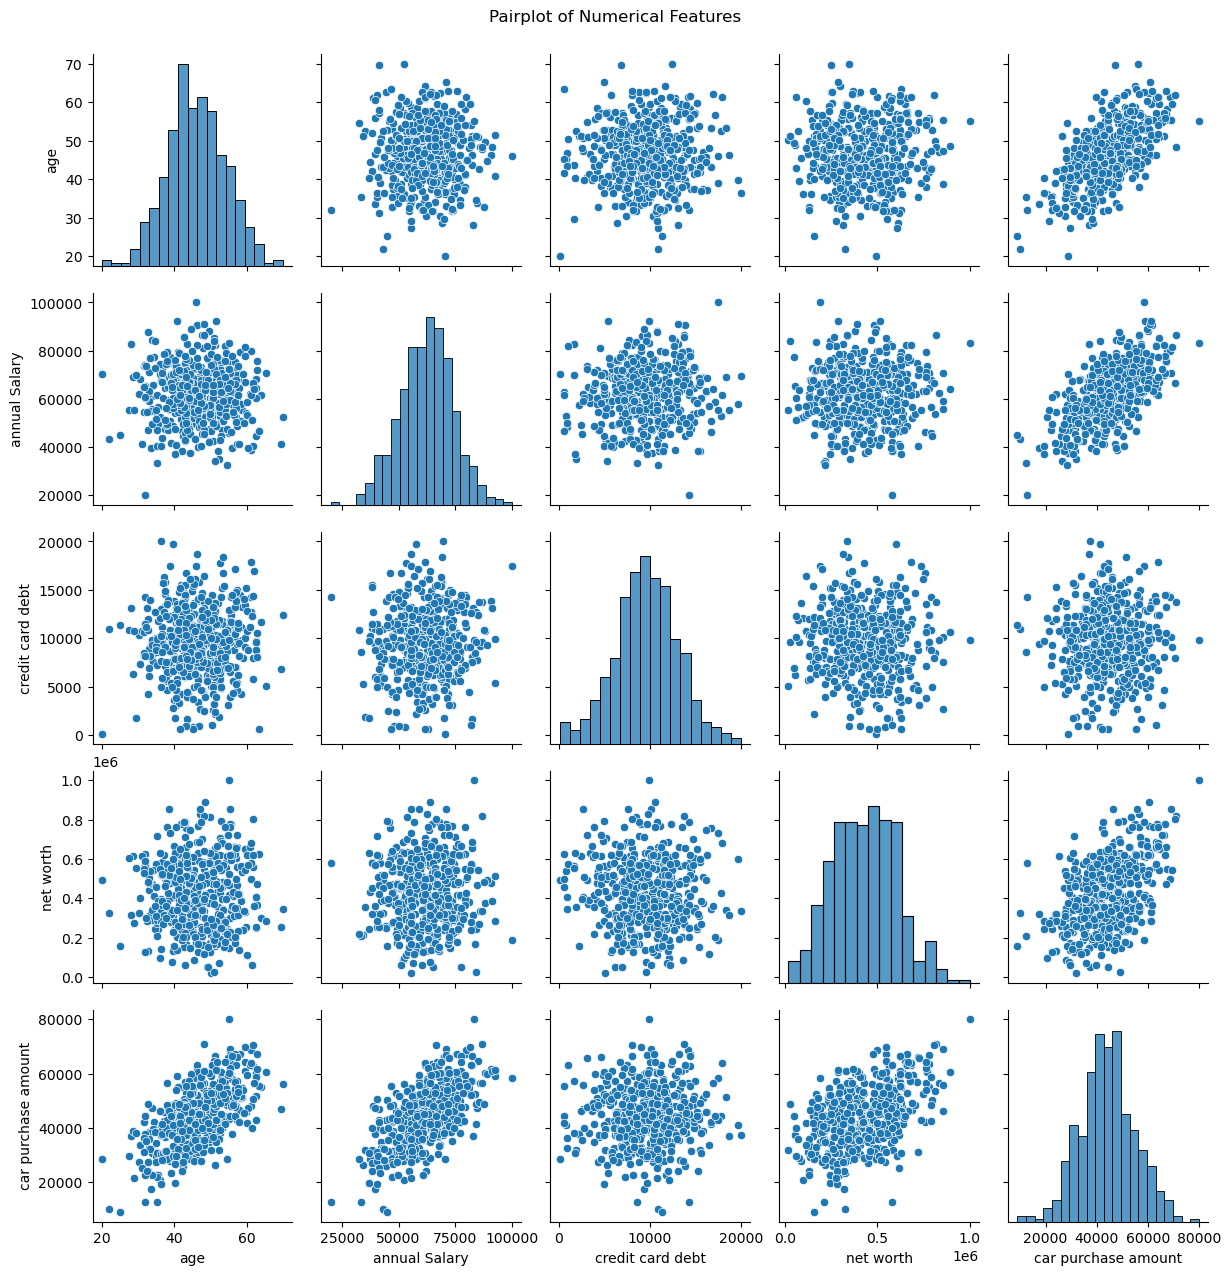

In [70]:
sns.pairplot(df[numeric_columns])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

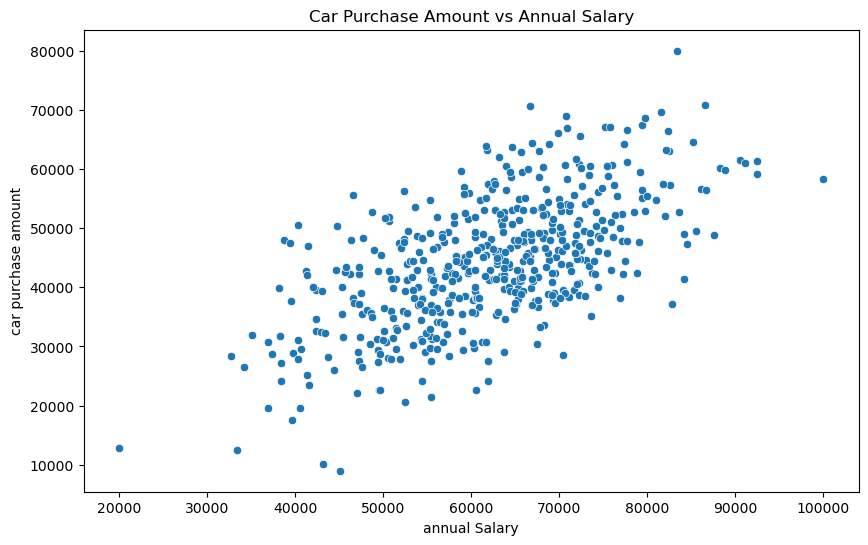

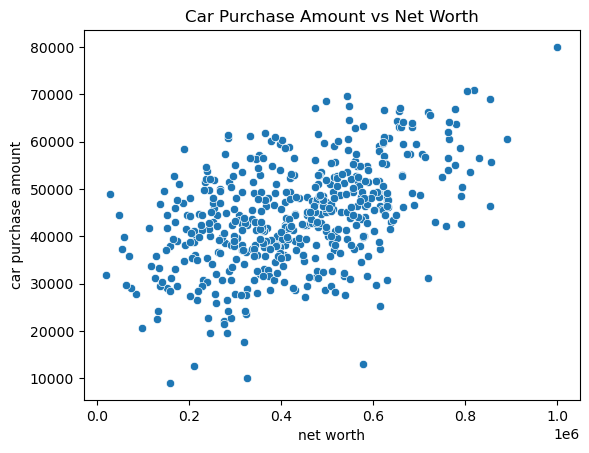

In [72]:
plt.figure(figsize=(10, 6))

# Scatter plot: Car purchase amount vs Annual Salary
sns.scatterplot(x=df['annual Salary'], y=df['car purchase amount'])
plt.title('Car Purchase Amount vs Annual Salary')

plt.show()

# Scatter plot: Car purchase amount vs Net Worth
sns.scatterplot(x=df['net worth'], y=df['car purchase amount'])
plt.title('Car Purchase Amount vs Net Worth')

plt.show()

gender
0    44933.131928
1    43503.620644
Name: car purchase amount, dtype: float64


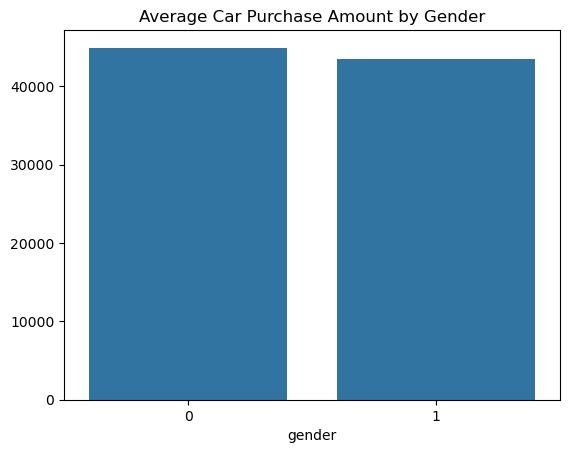

country
Bonaire, Sint Eustatius and Saba    70878.296640
Nauru                               68678.435200
Cook Islands                        67422.363130
Korea, South                        65583.078025
Ukraine                             61404.225780
Trinidad and Tobago                 60526.977880
Liberia                             60501.843450
Moldova                             59758.732470
San Marino                          58918.727530
Denmark                             58350.318090
Name: car purchase amount, dtype: float64


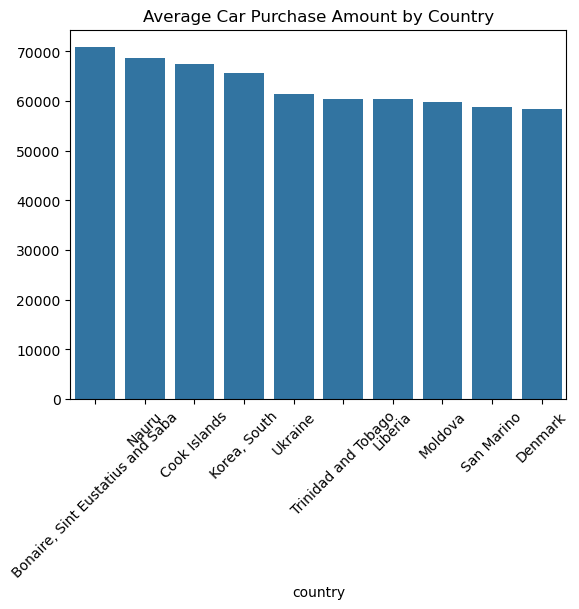

In [74]:
gender_avg = df.groupby('gender')['car purchase amount'].mean()
print(gender_avg)

# Plotting average car purchase amount by gender
sns.barplot(x=gender_avg.index, y=gender_avg.values)
plt.title('Average Car Purchase Amount by Gender')
plt.show()

# Average Car Purchase Amount by Country (Top 10 Countries)
country_avg = df.groupby('country')['car purchase amount'].mean().sort_values(ascending=False).head(10)
print(country_avg)

# Plotting average car purchase amount by country
sns.barplot(x=country_avg.index, y=country_avg.values)
plt.title('Average Car Purchase Amount by Country')
plt.xticks(rotation=45)
plt.show()

## Segmentation (Clustering)

In [85]:
print(df.isnull().sum())

features = df[['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']]

features = features.fillna(features.median())

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

customer name              0
customer e-mail            0
country                    0
gender                     0
age                        0
annual Salary              0
credit card debt           0
net worth                  0
car purchase amount        0
cluster                    0
cluster_label              0
annual Salary_scaled       0
credit card debt_scaled    0
net worth_scaled           0
affordability_score        0
affordability_category     0
buyer                      0
dtype: int64


In [87]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

print(df['cluster'].value_counts())

cluster
2    150
1    125
0    114
3    111
Name: count, dtype: int64


## Visualisations of Clusters

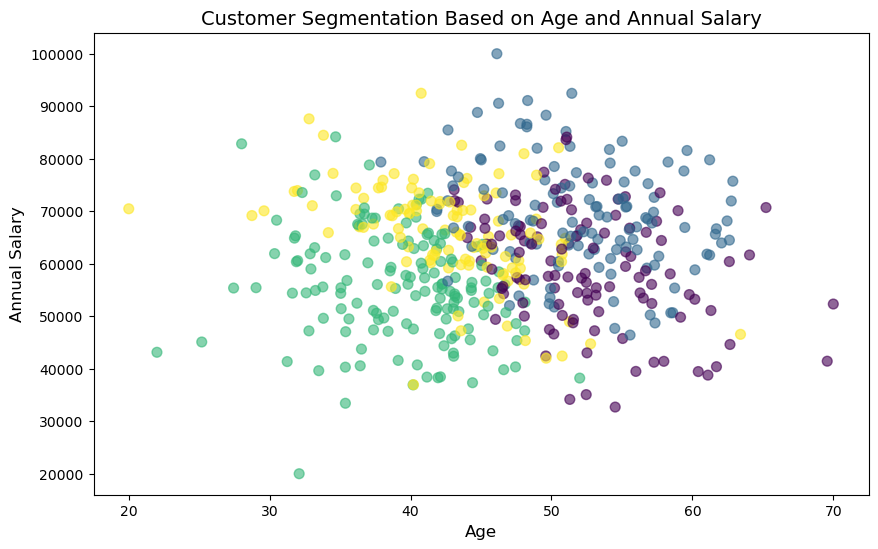

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['annual Salary'], c=df['cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('Customer Segmentation Based on Age and Annual Salary', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Annual Salary', fontsize=12)
plt.show()

In [92]:
cluster_summary = df.groupby('cluster')[['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']].mean()

print(cluster_summary)

               age  annual Salary  credit card debt      net worth  \
cluster                                                              
0        52.428243   59382.192050       9587.106302  272542.175516   
1        52.050996   69128.909767      10920.624116  559936.658920   
2        39.351172   55646.230681      11036.126328  393099.989103   
3        42.657361   65819.834118       6219.778758  501900.613273   

         car purchase amount  
cluster                       
0               43266.083074  
1               56759.135261  
2               33654.205148  
3               45311.202332  


In [94]:
labels = {
    0: "Middle-aged, Moderate Income & Spending",
    1: "Affluent, Older, High Income & High Spending",
    2: "Young, High Debt, Lower Spending",
    3: "Middle-aged, Good Income & Low Debt"
}

df['cluster_label'] = df['cluster'].map(labels)

print(df[['customer name', 'cluster', 'cluster_label']].head())

     customer name  cluster                                 cluster_label
0    Martina Avila        2              Young, High Debt, Lower Spending
1    Harlan Barnes        3           Middle-aged, Good Income & Low Debt
2  Naomi Rodriquez        2              Young, High Debt, Lower Spending
3  Jade Cunningham        1  Affluent, Older, High Income & High Spending
4     Cedric Leach        1  Affluent, Older, High Income & High Spending


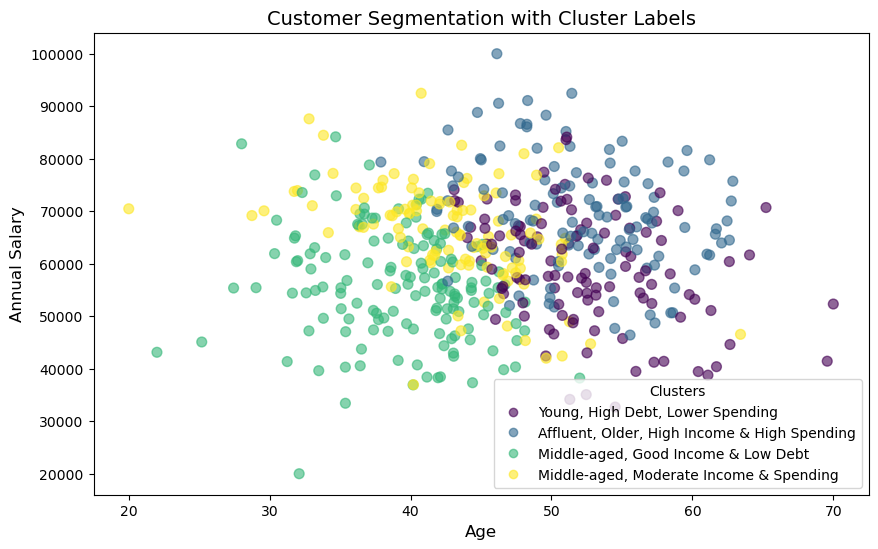

In [96]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['age'], df['annual Salary'], c=df['cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('Customer Segmentation with Cluster Labels', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Annual Salary', fontsize=12)

# Create a legend with labels
handles, labels_ = scatter.legend_elements()
plt.legend(handles, ['Young, High Debt, Lower Spending', 
                     'Affluent, Older, High Income & High Spending', 
                     'Middle-aged, Good Income & Low Debt',
                     'Middle-aged, Moderate Income & Spending'], title="Clusters")

plt.show()

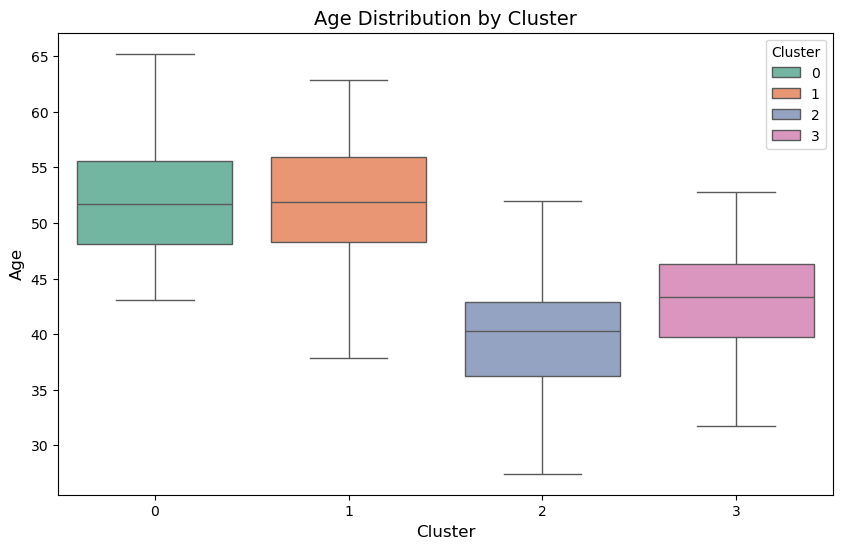

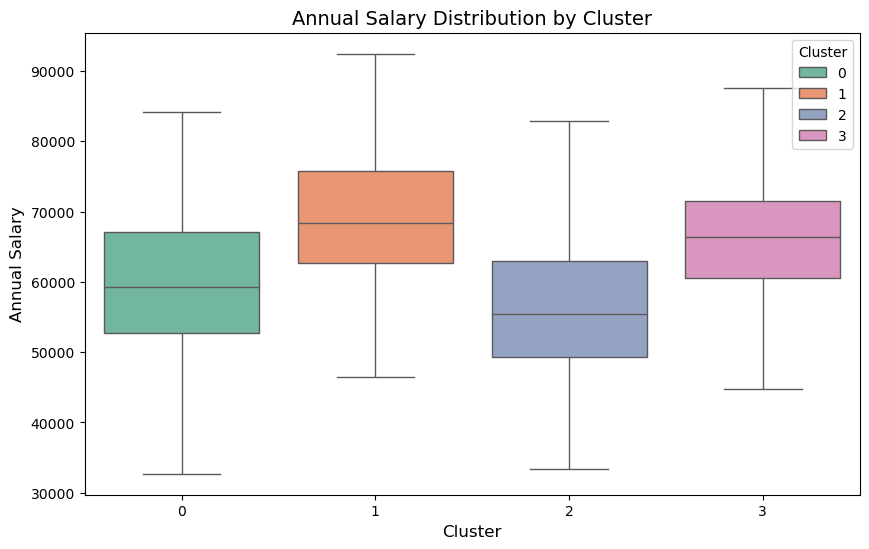

In [102]:
# Box plot for age distribution across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cluster', y='age', hue='cluster', palette='Set2', showfliers=False)
plt.title('Age Distribution by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Box plot for annual Salary distribution across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cluster', y='annual Salary', hue='cluster', palette='Set2', showfliers=False)
plt.title('Annual Salary Distribution by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Annual Salary', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.show()

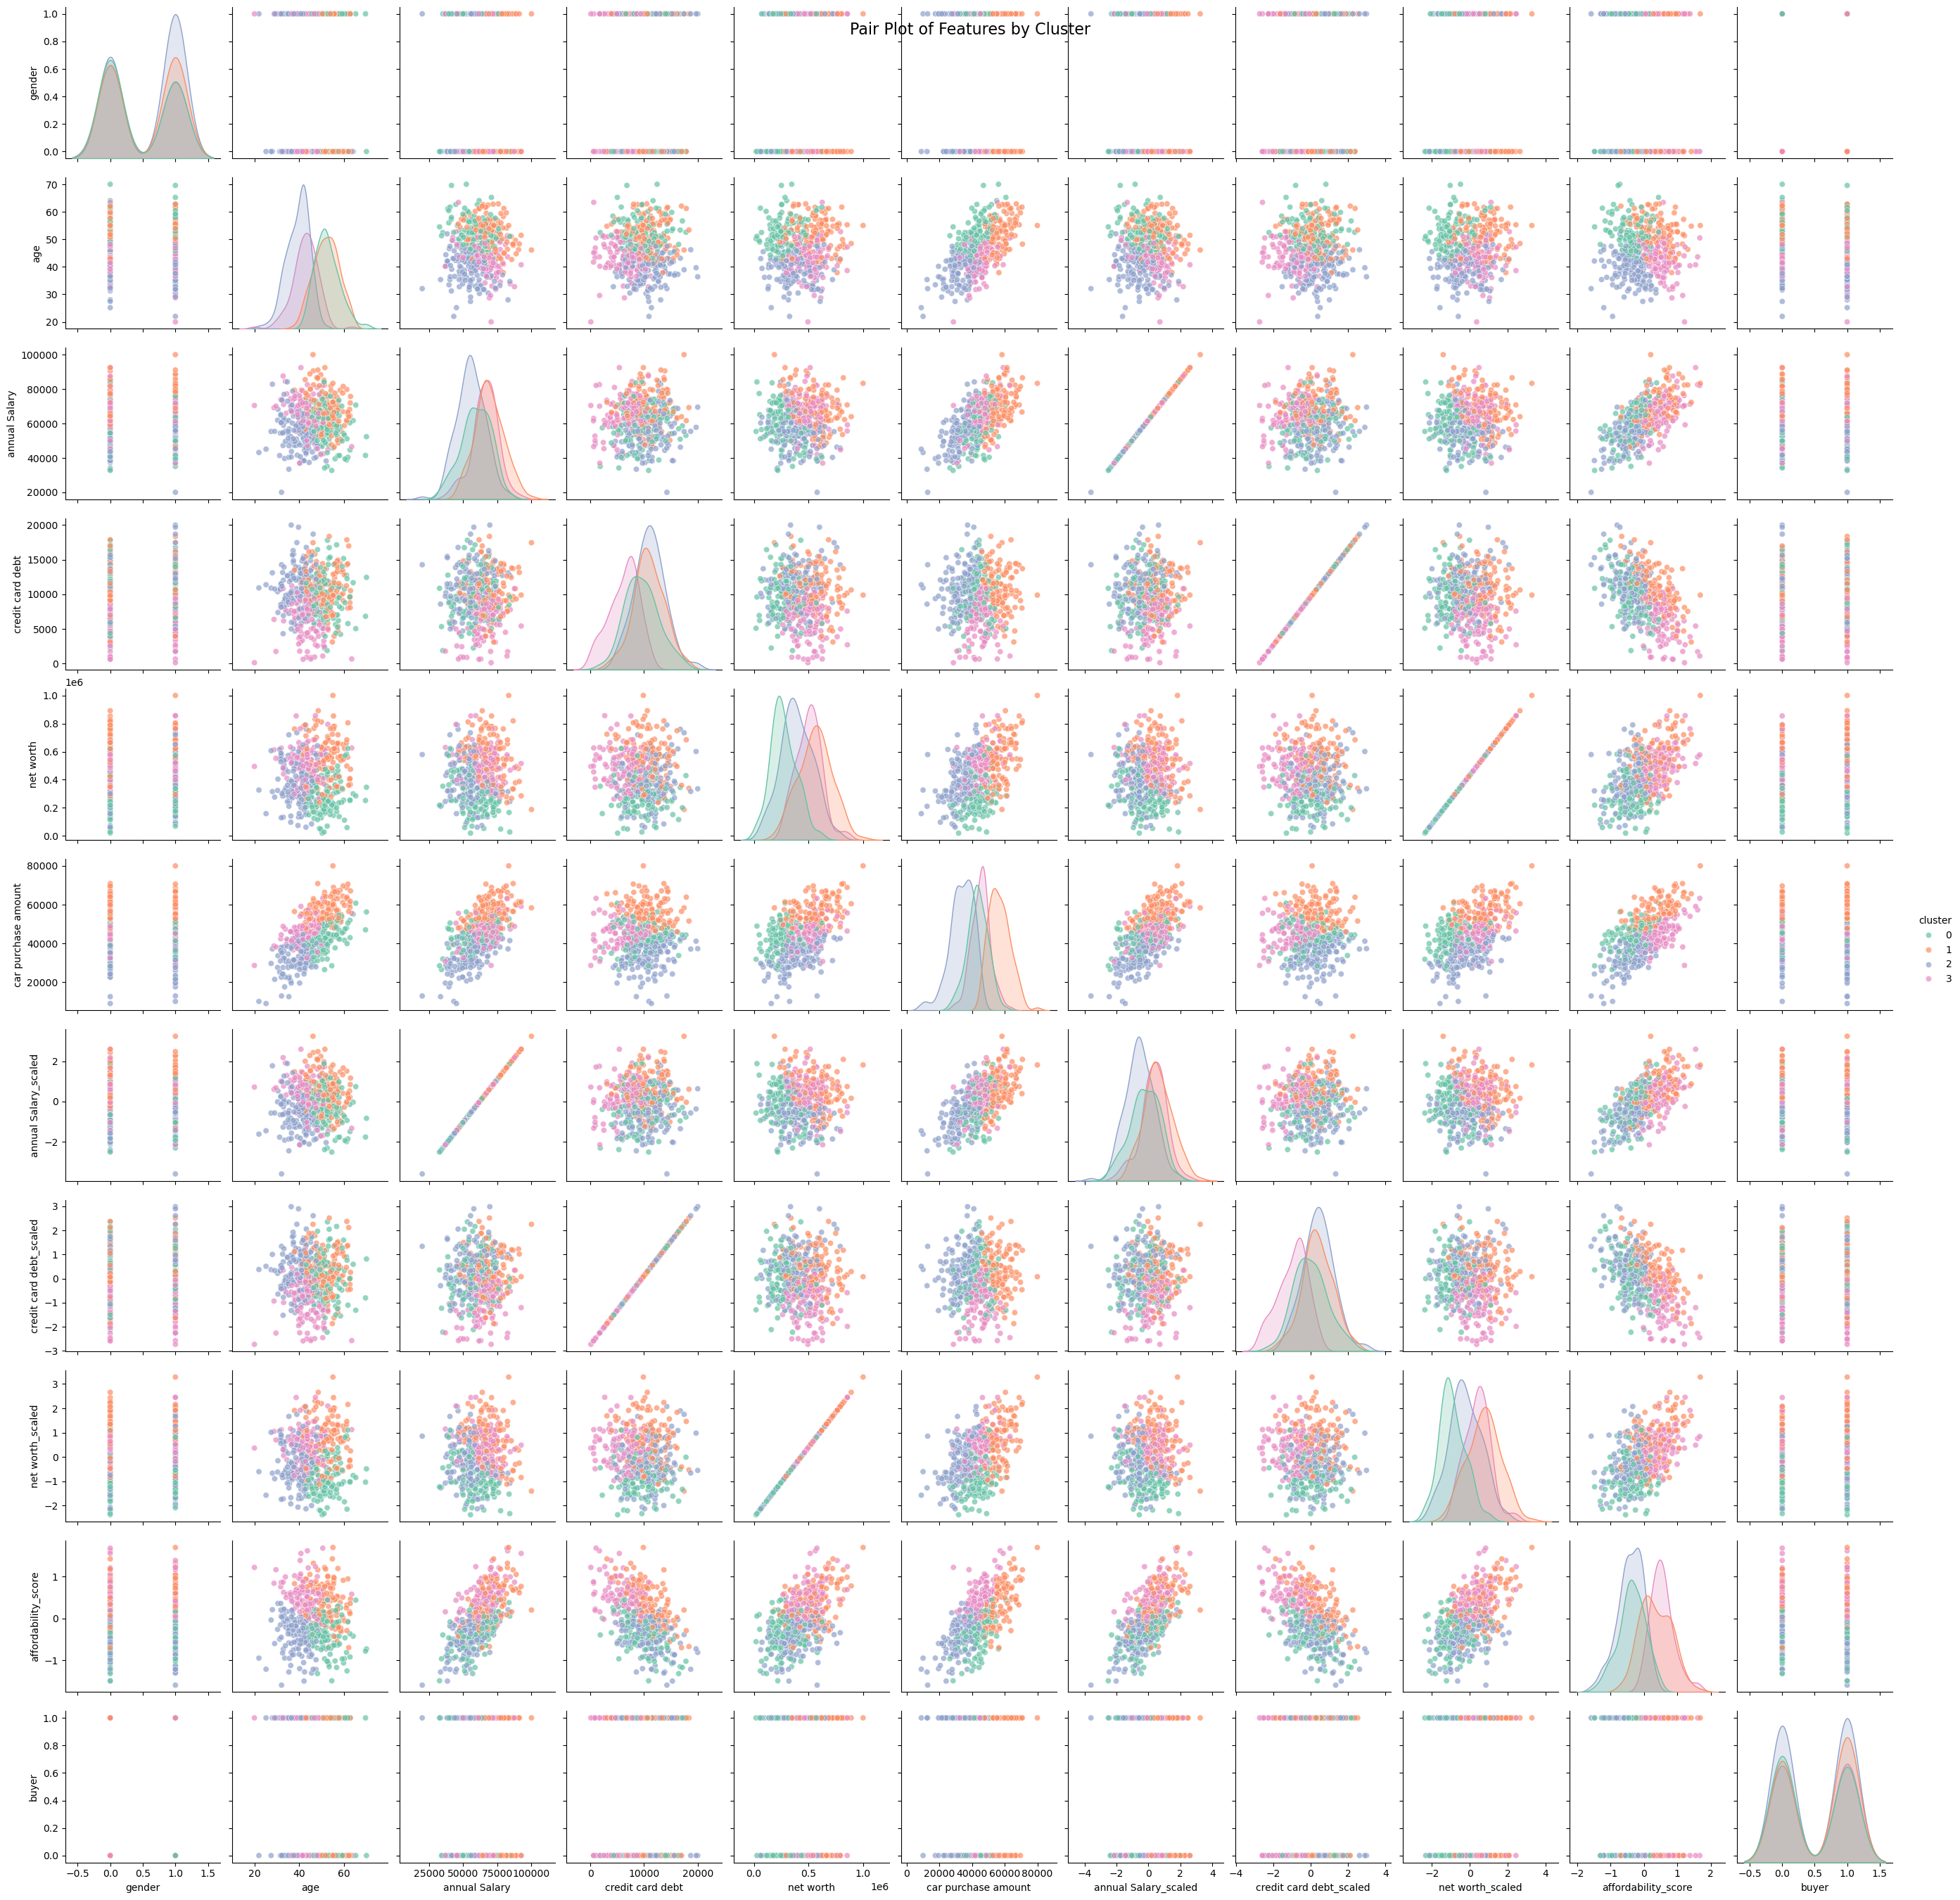

In [104]:
sns.pairplot(df, hue='cluster', palette='Set2', plot_kws={'alpha':0.7})
plt.suptitle('Pair Plot of Features by Cluster', fontsize=16)
plt.show()

## Affordability Scoring

In [107]:
from sklearn.preprocessing import StandardScaler

features = df[['annual Salary', 'credit card debt', 'net worth']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

df[['annual Salary_scaled', 'credit card debt_scaled', 'net worth_scaled']] = features_scaled_df

In [111]:
weights = {
    'annual Salary_scaled': 0.4,
    'credit card debt_scaled': -0.3,
    'net worth_scaled': 0.3
}

df['affordability_score'] = (
    df['annual Salary_scaled'] * weights['annual Salary_scaled'] +
    df['credit card debt_scaled'] * weights['credit card debt_scaled'] +
    df['net worth_scaled'] * weights['net worth_scaled']
)

conditions = [
    (df['affordability_score'] < -0.5),
    (df['affordability_score'] >= -0.5) & (df['affordability_score'] < 0.5),
    (df['affordability_score'] >= 0.5)
]
choices = ['Low', 'Medium', 'High']

df['affordability_category'] = pd.cut(df['affordability_score'], bins=[-float('inf'), -0.5, 0.5, float('inf')], labels=choices)

df[['customer name', 'affordability_score', 'affordability_category']].head()

customer name  affordability_score affordability_category
0    Martina Avila            -0.481992                 Medium
1    Harlan Barnes             0.329792                 Medium
2  Naomi Rodriquez            -0.060387                 Medium
3  Jade Cunningham             0.377885                 Medium
4     Cedric Leach             0.506578                   High

## Classification

In [114]:
np.random.seed(42) 
df['buyer'] = np.random.choice([0, 1], size=len(df))

print(df[['customer name', 'annual Salary', 'net worth', 'buyer']].head())

     customer name  annual Salary    net worth  buyer
0    Martina Avila    62812.09301  238961.2505      0
1    Harlan Barnes    66646.89292  530973.9078      1
2  Naomi Rodriquez    53798.55112  638467.1773      0
3  Jade Cunningham    79370.03798  548599.0524      0
4     Cedric Leach    59729.15130  560304.0671      0


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['age', 'annual Salary', 'credit card debt', 'net worth']]
y = df['buyer']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shape of training data:", X_train.shape)
print("Shape of test data:", X_test.shape)

Shape of training data: (400, 4)
Shape of test data: (100, 4)


In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.45

Confusion Matrix:
 [[19 34]
 [21 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.36      0.41        53
           1       0.43      0.55      0.49        47

    accuracy                           0.45       100
   macro avg       0.45      0.46      0.45       100
weighted avg       0.46      0.45      0.44       100



In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy Score:", accuracy)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Accuracy Score: 0.54

Confusion Matrix:
 [[23 30]
 [16 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.43      0.50        53
           1       0.51      0.66      0.57        47

    accuracy                           0.54       100
   macro avg       0.55      0.55      0.54       100
weighted avg       0.55      0.54      0.53       100

